In [123]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

import numpy as np

%matplotlib inline

In [124]:
with open('VBS Mutual Bank - The Great Bank Heist.txt', 'r') as myfile:
    data=myfile.read().replace('\n', ' ')

In [125]:
data[:1000]

'More than forty years ago the most daring heist in South Africa’s banking history took place. A group of industrious thieves, led by the elusive Mister Nightingale, skillfully tunneled their way some twenty-one meters underground into the vault of the Standard Bank in Krugersdorp. The bold bank robbers withdrew the princely sum of R400 000. They disappeared with the loot and no arrests were ever made. I have, for the past five months, investigated the sorry affairs of the VBS Mutual Bank. My report will reveal that the perpetrators of the heist at VBS made away with almost R2 billion. And they certainly did not put in anything like the hard work and effort of Mister Nightingale and his team. I trust that, in this case, arrests will be made. \x0cINTRODUCTION 1  Against the backdrop of, inter alia, a severe liquidity crisis that prevailed at VBS Mutual Bank ("VBS"), the Minister of Finance placed VBS under curatorship with effect from 11 March 2018. SizweNtsalubaGobodo Advisory Services

In [126]:
from wordcloud import WordCloud, STOPWORDS
import random
from PIL import Image    # to import the image


all_stopwords = ['said', "'s"]

STOPWORDS.update(all_stopwords)

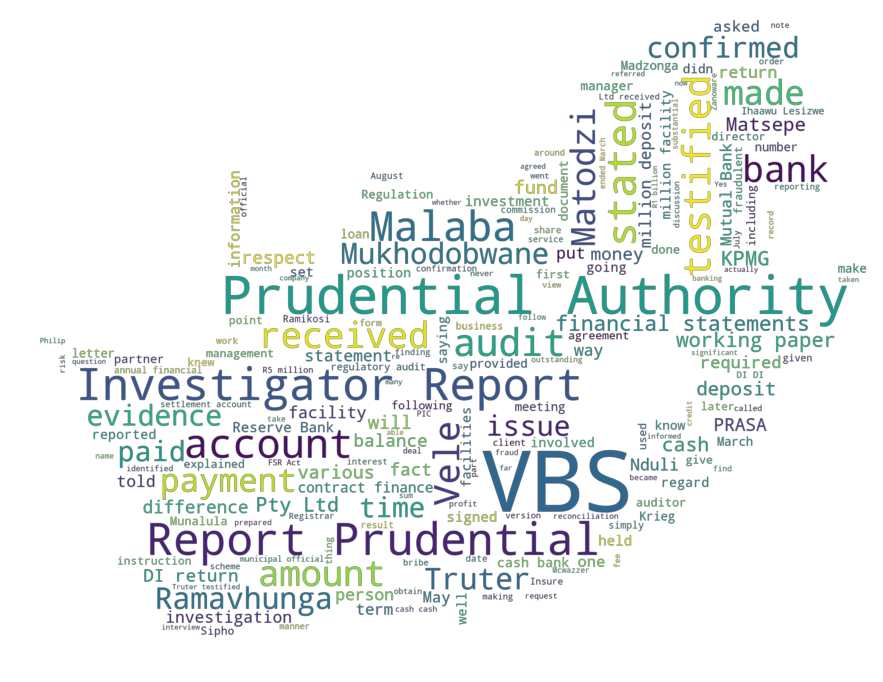

In [16]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(90, 100)

wave_mask = np.array(Image.open("South_Africa_sat.jpg"))

wordcloud = WordCloud(width=1000,
                      height=1000,
                      max_font_size=200,
                      mask=wave_mask,
                      stopwords=STOPWORDS,
                     background_color=None,
                     mode='RGBA').generate(data)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

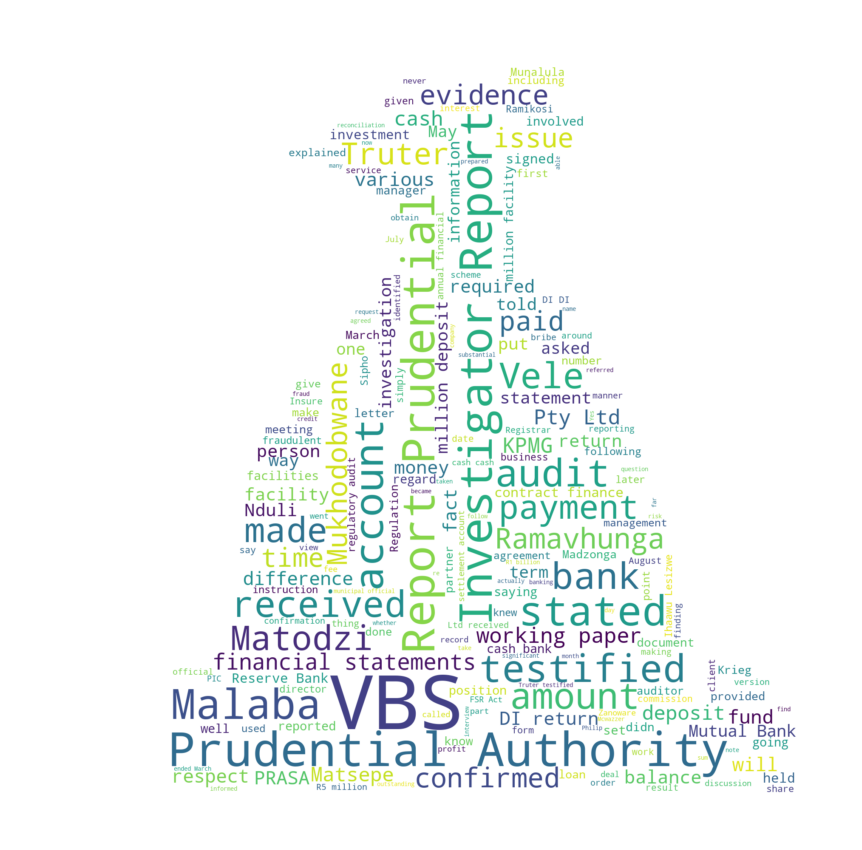

In [17]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(90, 100)

wave_mask = np.array(Image.open("money-bags.jpg"))

wordcloud = WordCloud(width=1000,
                      height=1000,
                      mask=wave_mask,
                      stopwords=STOPWORDS,
                     background_color='white',
                     mode='RGBA').generate(data)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [127]:
import spacy
import en_core_web_sm

spacy_nip = en_core_web_sm.load()
document = spacy_nip(data)

In [128]:
labels = []

for element in document.ents:
    labels.append('Type: %s, Value: %s' % (element.label_, element))
    
tokens = []
    
for i in document:
    tokens.append('Type: %s, Value: %s' % (i.pos_, i))

In [129]:
adj_df = pd.Series(tokens)
adj_df = adj_df[adj_df.str.contains('ADJ')]

In [130]:
verb_df = pd.Series(tokens)
verb_df = verb_df[verb_df.str.contains('VERB')]

verb_df = verb_df.reset_index()
verb_df.columns = ['index', 'term']

def remove_VERB(df_column):
    return df_column.replace('Type: VERB, Value: ', '')

verb_df['term'] = verb_df['term'].apply(remove_VERB)

In [131]:
adj_df = adj_df.reset_index()
adj_df.columns = ['index', 'term']

In [132]:
def remove_ADJ(df_column):
    return df_column.replace('Type: ADJ, Value: ', '')

In [133]:
type_df = pd.Series(labels)

In [134]:
people_df = type_df[type_df.str.contains('PERSON')].replace('Type: PERSON, Value:  ', '')
org_df = type_df[type_df.str.contains('ORG')].replace('Type: ORG, Value:  ', '')

In [135]:
people_df = type_df[type_df.str.contains('PERSON')].reset_index()
org_df = type_df[type_df.str.contains('ORG')].reset_index()

In [136]:
people_df.columns = ['index', 'term']
org_df.columns = ['index', 'term']

In [137]:
def remove_ORG(df_column):
    return df_column.replace('Type: ORG, Value: ', '')

def remove_PERSON(df_column):
    return df_column.replace('Type: PERSON, Value: ', '')

In [138]:
people_df['term'].apply(remove_PERSON)
org_df['term'].apply(remove_ORG)

0                                       the Standard Bank
1                                             Krugersdorp
2                                     the VBS Mutual Bank
3                                                     VBS
4                                         VBS Mutual Bank
5                                                     VBS
6                                                     VBS
7                   SizweNtsalubaGobodo Advisory Services
8                                                     VBS
9                                                     VBS
10                         the South African Reserve Bank
11                               the Prudential Authority
12                                                    VBS
13                                                       
14                                                    VBS
15                                  Investigator’s Report
16                               the Prudential Authority
17            

In [139]:
org_lst = list(org_df['term'].apply(remove_ORG))
people_lst = list(people_df['term'].apply(remove_PERSON))

In [140]:
org_string = ' '.join(org_lst)
people_string = ' '.join(people_lst)

In [141]:
org_string = org_string.replace('  ', '')
people_string = people_string.replace('  ', '')

In [142]:
people_string = people_string.replace('Vele Vele', 'Vele')
people_string = people_string.replace('Matsepe Matsepe', 'Matsepe')
people_string = people_string.replace('Madzonga Madzonga', 'Madzonga')
people_string = people_string.replace('Philip Philip', 'Phillip')
people_string = people_string.replace('Zonoware Zonoware', 'Zonoware')

In [143]:
adj_lst = list(adj_df['term'].apply(remove_ADJ))
adj_string = ' '.join(adj_lst)
adj_string = adj_string.replace('  ', '')

In [144]:
all_stopwords = ['his', 'that', 'which', 'its',
                 'other', 'such', 'their', 'her',
                 'my', 'r', 'able', 'all', 'vbs',
                 'first', 'your',]

STOPWORDS.update(all_stopwords)

In [149]:
people_string[:100]

'Nightingale Nightingale Anoosh Rooplal Werksmans Attorneys Bernard Hotz Ross Hutton SC Christelle va'

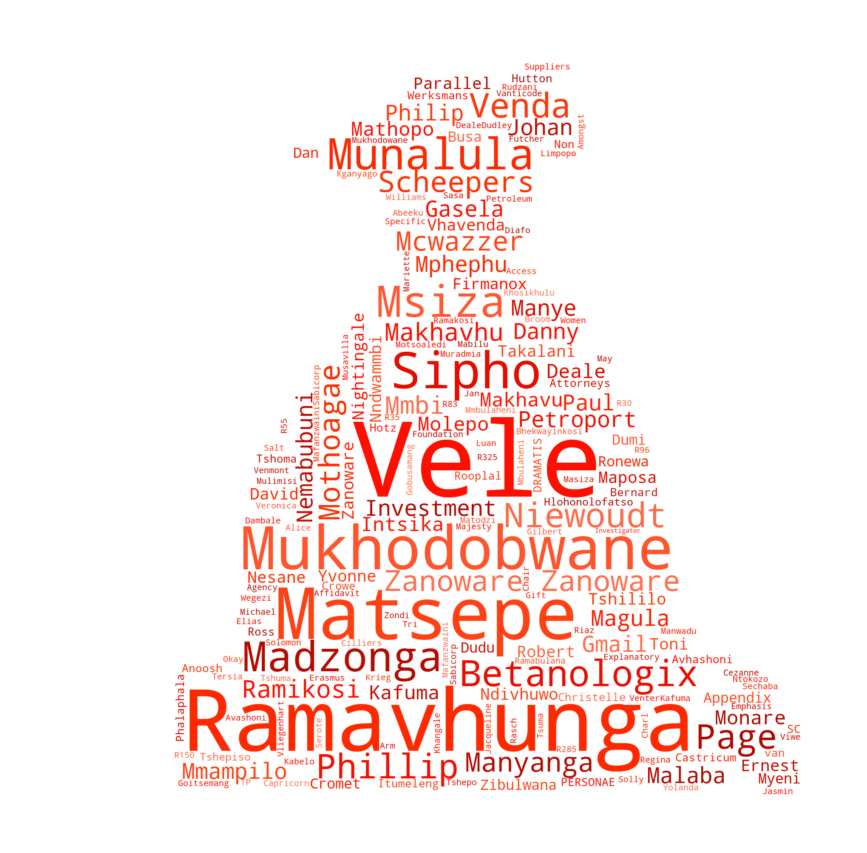

In [157]:
def red_color_func(word, font_size, position, orientation, random_state=None, font_path=None):
    return "hsl(10, 130%%, %d%%)" % random.randint(30, 70)


wave_mask = np.array(Image.open("money-bags.jpg"))

wordcloud = WordCloud(mask=wave_mask,
                      width=1000,
                      height=860,
                      stopwords=STOPWORDS,
                     background_color='white').generate(people_string)


plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=red_color_func),
           interpolation="bilinear")
plt.show()

In [46]:
verb_lst = list(verb_df['term'])
verb_string = ' '.join(verb_lst)
verb_string = verb_string.replace('  ', '')

In [47]:
verb_string

'took led tunneled withdrew disappeared were made have investigated will reveal made did put trust will be made prevailed placed SizweNtsalubaGobodo was appointed is represented revealed established promulgated appointed conducting is establish was conducted defraud involved defraud had been appointed represented assist were appointed assist have provided have acted took appointed provide have played are are has played securing has been presented have taken are cyber took secured were scanned converted took imaged stored has been collated has proved are chartered has conducted are implicated have taken has provided tracing has assisted arose played requested undertake deposited named were identified being have delivered is contained shall make has been conducted are afforded is questioned required produce provides follows is questioned required produce contemplated contemplated is exercising contemplated may object answering producing may tend incriminate conducting may require be answ

In [48]:
import re, requests

def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = text.replace('tweet', '')
    text = text.replace('share', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [49]:
verb_string = clean_text(verb_string)

In [50]:
verb_string

'took led tunneled withdrew disappeared were made have investigated will reveal made did put trust will be made prevailed placed sizwentsalubagobodo was appointed is represented revealed established promulgated appointed conducting is establish was conducted defraud involved defraud had been appointed represented assist were appointed assist have provided have acted took appointed provide have played are are has played securing has been presented have taken are cyber took secured were scanned converted took imaged stored has been collated has proved are chartered has conducted are implicated have taken has provided tracing has assisted arose played requested undertake deposited named were identified being have delivered is contained shall make has been conducted are afforded is questioned required produce provides follows is questioned required produce contemplated contemplated is exercising contemplated may object answering producing may tend incriminate conducting may require be answ

In [102]:
all_stopwords = ['his', 'that', 'which', 'its',
                 'other', 'such', 'their', 'her',
                 'my', 'r', 'able', 'all', 'vbs',
                 'first', 'your', "'s"]

STOPWORDS.update(all_stopwords)

In [103]:
import seaborn as sns
import numpy as np

import nltk

# The function uses NLP to find the most popular words in given text

def popular_words(text_column):

    # Converting all project descriptions to text
    text = text_column
    text = text.str.cat(sep=' ')
    text = text.split(' ')

    # Remove single-character tokens (mostly punctuation)
    text = [word for word in text if len(word) > 1]

    # Lowercase all words (default_stopwords are lowercase too)
    text = [word.lower() for word in text]

    # Remove stopwords
    text = [word for word in text if word not in STOPWORDS]

    fdist = nltk.FreqDist(text)
    
    return fdist.most_common()

In [104]:
popular_words(verb_df['term'])

[('testified', 129),
 ('stated', 121),
 ('received', 116),
 ('made', 90),
 ('confirmed', 53),
 ('paid', 52),
 ('working', 50),
 ('will', 39),
 ('asked', 38),
 ('required', 36),
 ('reported', 36),
 ('’s', 35),
 ('put', 34),
 ('told', 34),
 ('know', 31),
 ('held', 29),
 ('give', 29),
 ('signed', 29),
 ('granted', 28),
 ('going', 27),
 ('saying', 27),
 ('involved', 25),
 ('provided', 25),
 ('set', 25),
 ('done', 24),
 ('including', 23),
 ('explained', 23),
 ('make', 22),
 ('used', 22),
 ('knew', 22),
 ('taken', 21),
 ('given', 21),
 ('follows', 20),
 ('informed', 20),
 ('took', 18),
 ('referred', 18),
 ('ended', 18),
 ('identified', 17),
 ('went', 17),
 ('called', 17),
 ('admitted', 17),
 ('denied', 17),
 ('gave', 17),
 ('say', 17),
 ('obtain', 17),
 ('created', 17),
 ('named', 16),
 ('became', 16),
 ('prepared', 16),
 ('may', 15),
 ('following', 15),
 ('making', 15),
 ('agreed', 15),
 ('conceded', 15),
 ('find', 15),
 ('obtained', 14),
 ('found', 14),
 ('earned', 14),
 ('create', 14),
 (

In [108]:
# Here we apply the function above

aust_words = popular_words(verb_df['term'])

# And we create a new dataframe

labels = ['Word', 'Frequency']
aust_words = pd.DataFrame(aust_words, columns=labels)

# And we'll display the top 20

aust_words.head(20).to_csv('verbs.csv')

ValueError: Could not interpret input 'Word'

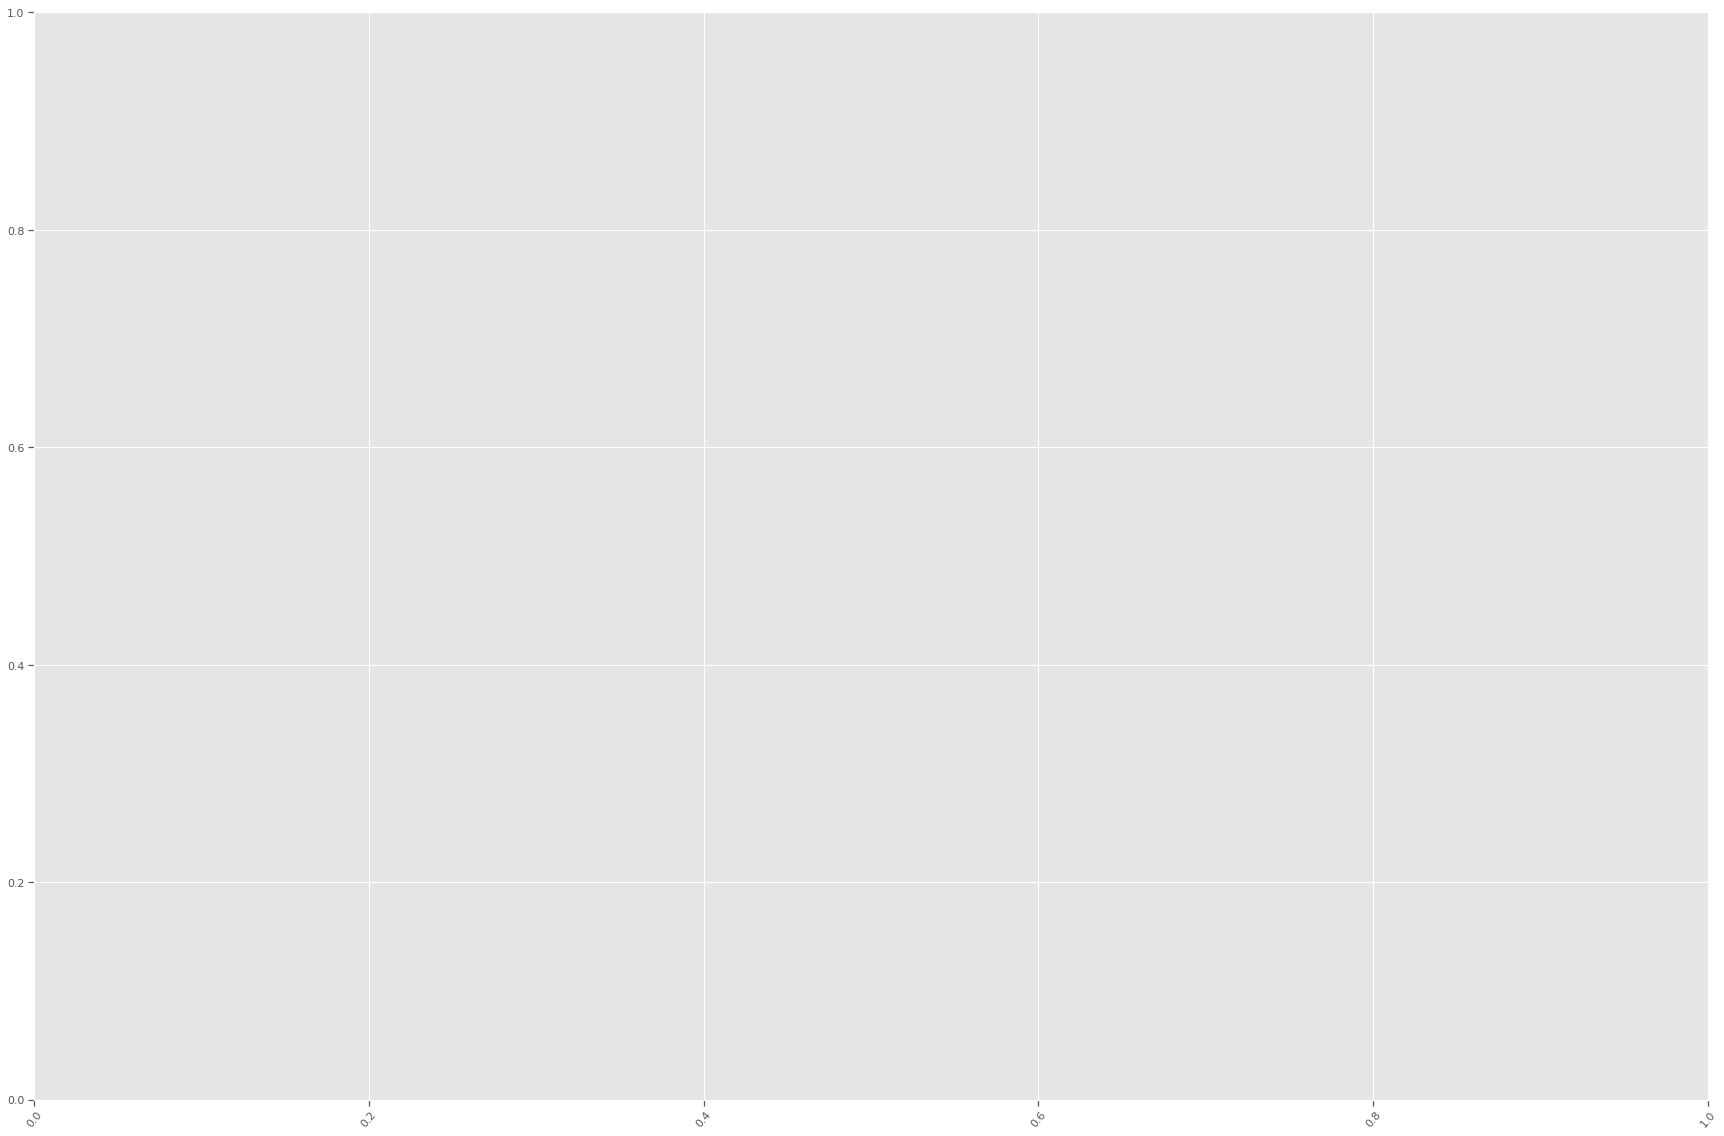

In [107]:
f, ax = plt.subplots(figsize=(30, 20))

sns.set_color_codes("muted")
sns.set_context("notebook", font_scale=1)
plt.xticks(rotation=50)

g = sns.barplot(x = 'Word',
            y = 'Frequency',
            data = verb_df[:30],
            palette='dark',
            alpha=.6)

g.set_xlabel("Word",fontsize=5)
g.set_ylabel("Frequency",fontsize=5)

plt.xticks(rotation=90)

plt.suptitle('Most Used Verbs', fontsize=16)

plt.show()